In [1]:
import pandas as pd
from process_bulk import ProcessBulk
import matplotlib.pyplot as plt
import seaborn as sns
from process_geography import Ward
import evaluation_helpers
import os
from copy import deepcopy

For more plots, see birmingham_analysis_plots

In [2]:
pd.options.mode.copy_on_write = True


For calculating the Townsend Deprivation Index, I need 4 different variables: 
    - Unemployment 
    - Non-car ownership (DC4202EW: Tenure by car or van availability by ethnic group of Household Reference Person (HRP))
    - Non-home ownership (means Tenure=not owned)
    - Overcrowding (persons per room)

In [4]:
DATA_DIR = "../census_data"

bulk_folder_name = "bulk_data"

ward_folder_name_tenure = "dc4201ew_htward"
ward_folder_name_occupancy = "dc4206ew_htward"
ward_folder_name_car = "dc4202ew_htward"
ward_folder_name_economic = "dc6201ew_htward"

index_sheet_name = "Cell Numbered DC Tables 3.2.xlsx"
index_sheet_name_economic = "Cell Numbered DC Tables 3.1.xlsx"
# index_sheet_name_occupation = 'cell_numbered_table_layouts_S1.xlsx'

cl_folder_name = "confidence_intervals"
cl_sheet_name = "2011censusconfidenceintervalsdec2013_tcm77-271638.xlsx"
cl_table_name = "95% CI widths (LA level)"

p_cl = ProcessBulk(bulk_folder=cl_folder_name, index_sheet=cl_sheet_name)

p = ProcessBulk(bulk_folder=bulk_folder_name, index_sheet=index_sheet_name)

p_economic = ProcessBulk(
    bulk_folder=bulk_folder_name, index_sheet=index_sheet_name_economic
)

# Tenure by ethnic group by age - Household Reference Persons
table_name_tenure = "DC4201EW"
# Dwelling type by type of central heating in household by occupancy rating (bedrooms) by ethnic group of Household Reference Person (HRP)
table_name_occupancy = "DC4206EW"
# Tenure by car or van availability by ethnic group of Household Reference Person (HRP)
table_name_car = "DC4202EW"
# Economic activity by ethnic group by sex by age
table_name_economic = "DC6201EW"

In [5]:
dp_folder_name = "datasets_dp_deprivation"
dp_folder_name_la = "datasets_dp_deprivation_la"
path_tenure = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name, "tenure")
)
path_occupancy = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name, "occupancy")
)
path_car = os.path.join(p.get_bulk_data_path(), os.path.join(dp_folder_name, "car"))
path_economic = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name, "economic")
)
path_deprivation_scores = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name, "deprivation_scores")
)
path_indicators = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name, "deprivation_indicators")
)

path_tenure_la = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name_la, "tenure")
)
path_occupancy_la = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name_la, "occupancy")
)
path_car_la = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name_la, "car")
)
path_economic_la = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name_la, "economic")
)
path_deprivation_scores_la = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name_la, "deprivation_scores")
)
path_indicators_la = os.path.join(
    p.get_bulk_data_path(), os.path.join(dp_folder_name_la, "deprivation_indicators")
)

fig_folder_name = "figs/deprivation_index"

In [6]:
epsilons_short = [0.001, 0.01, 0.1, 1]
epsilons_short_base = [0.001, 0.01, 0.1, 1, 0]

In [7]:
# list of ethnicities for filtering
general_ethnicities = [
    "White: Total",
    "Mixed/multiple ethnic group: Total",
    "Asian/Asian British: Total",
    "Black/African/Caribbean/Black British: Total",
    "Other ethnic group: Total",
]
detailed_ethnicities = [
    "White: English/Welsh/Scottish/Northern Irish/British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "White: Other White",
    "Mixed/multiple ethnic group: White and Black Caribbean",
    "Mixed/multiple ethnic group: White and Black African",
    "Mixed/multiple ethnic group: White and Asian",
    "Mixed/multiple ethnic group: Other Mixed",
    "Asian/Asian British: Indian",
    "Asian/Asian British: Pakistani",
    "Asian/Asian British: Bangladeshi",
    "Asian/Asian British: Chinese",
    "Asian/Asian British: Other Asian",
    "Black/African/Caribbean/Black British: African",
    "Black/African/Caribbean/Black British: Caribbean",
    "Black/African/Caribbean/Black British: Other Black",
    "Other ethnic group: Arab",
    "Other ethnic group: Any other ethnic group",
]
white = ["White: English/Welsh/Scottish/Northern Irish/British"]

total_ethnicities = ["All categories: Ethnic group"]

# list of tenure categories for filtering
all_tenure = [
    "All categories: Tenure",
    "Owned or shared ownership: Total",
    "Owned: Owned outright",
    "Owned: Owned with a mortgage or loan or shared ownership",
    "Social rented: Total",
    "Social rented: Rented from council (Local Authority)",
    "Social rented: Other social rented",
    "Private rented or living rent free: Total",
    "Private rented: Private landlord or letting agency",
    "Private rented: Other private rented or living rent free",
]
general_tenure = [
    "Owned or shared ownership: Total",
    "Social rented: Total",
    "Private rented or living rent free: Total",
]
detailed_tenure = [
    "Owned: Owned outright",
    "Owned: Owned with a mortgage or loan or shared ownership",
    "Social rented: Rented from council (Local Authority)",
    "Social rented: Other social rented",
    "Private rented: Private landlord or letting agency",
    "Private rented: Other private rented or living rent free",
]

all_occupancy = [
    "All categories: Occupancy rating (bedrooms)",
    "Occupancy rating (bedrooms) of +2 or more",
    "Occupancy rating (bedrooms) of +1",
    "Occupancy rating (bedrooms) of 0",
    "Occupancy rating (bedrooms) of -1 or less",
]

detailed_occupancy = [
    "Occupancy rating (bedrooms) of +2 or more",
    "Occupancy rating (bedrooms) of +1",
    "Occupancy rating (bedrooms) of 0",
    "Occupancy rating (bedrooms) of -1 or less",
]

detailed_cars = [
    "No cars or vans in household",
    "1 car or van in household",
    "2 or more cars or vans in household",
]

all_economic = [
    "All categories: Economic activity",
    "Economically active: Total",
    "Economically active: In employment: Total",
    "Economically active: In employment: Employee: Total",
    "Economically active: In employment: Employee: Part-time",
    "Economically active: In employment: Employee: Full-time",
    "Economically active: In employment: Self-employed: Total",
    "Economically active: In employment: Self-employed: Part-time",
    "Economically active: In employment: Self-employed: Full-time",
    "Economically active: In employment: Full-time students",
    "Economically active: Unemployed: Total",
    "Economically active: Unemployed: Unemployed (excluding full time students)",
    "Economically active: Unemployed: Full-time students",
    "Economically inactive: Total",
    "Economically inactive: Retired",
    "Economically inactive: Student (including full-time students)",
    "Economically inactive: Looking after home or family",
    "Economically inactive: Long-term sick or disabled",
    "Economically inactive: Other",
]

economic_detailed = [
    "Economically active: In employment: Employee: Part-time",
    "Economically active: In employment: Employee: Full-time",
    "Economically active: In employment: Self-employed: Part-time",
    "Economically active: In employment: Self-employed: Full-time",
    "Economically active: In employment: Full-time students",
    "Economically active: Unemployed: Unemployed (excluding full time students)",
    "Economically active: Unemployed: Full-time students",
    "Economically inactive: Retired",
    "Economically inactive: Student (including full-time students)",
    "Economically inactive: Looking after home or family",
    "Economically inactive: Long-term sick or disabled",
    "Economically inactive: Other",
]

economic_inactive = [
    "Economically inactive: Retired",
    "Economically inactive: Student (including full-time students)",
    "Economically inactive: Looking after home or family",
    "Economically inactive: Long-term sick or disabled",
    "Economically inactive: Other",
]

In [8]:
ward = Ward()
geo_lookup = ward.get_geo_lookup_ward()

A higher deprivation score means that an area is more deprived, a lower score means it is less deprived and any scores around 0 are very close to the mean deprivation for the area
within the dataset.

In [9]:
indicators = pd.read_csv(os.path.join(path_indicators, "indicators_baseline"))
measurements = pd.read_csv(os.path.join(path_deprivation_scores, "baseline"))

indicators_la = pd.read_csv(os.path.join(path_indicators_la, "indicators_baseline"))
measurements_la = pd.read_csv(os.path.join(path_deprivation_scores_la, "baseline"))

features_corr = [
    "number_minorities",
    "number_ethnicities",
    "deprivation_score",
    "change_in_score",
    "change_in_quantile",
]
features_corr_eps = [
    "number_minorities",
    "number_ethnicities",
    "deprivation_score",
    "change_in_score",
    "change_in_quantile",
    "epsilon",
]

In [10]:
measurements_geometric_clipping = evaluation_helpers.read_dp_csvs(
    epsilons_short, path_deprivation_scores, "geometric_clipping"
)
indicators_geometric_clipping = pd.read_csv(
    os.path.join(path_indicators, "indicators_geometric_clipping")
)

measurements_geometric_clipping_la = evaluation_helpers.read_dp_csvs(
    epsilons_short, path_deprivation_scores_la, "geometric_clipping"
)
indicators_geometric_clipping_la = pd.read_csv(
    os.path.join(path_indicators_la, "indicators_geometric_clipping")
)

In [11]:
measurements_data_error = pd.read_csv(
    os.path.join(path_deprivation_scores, "data_error")
)
indicators_data_error = pd.read_csv(
    os.path.join(path_indicators, "indicators_data_error")
)

measurements_data_error_la = pd.read_csv(
    os.path.join(path_deprivation_scores_la, "data_error")
)
indicators_data_error_la = pd.read_csv(
    os.path.join(path_indicators_la, "indicators_data_error")
)

In [12]:
measurements_geometric_clipping_data_error = evaluation_helpers.read_dp_csvs(
    epsilons_short, path_deprivation_scores, "data_error_geometric_clipping"
)
indicators_data_error_geometric_clipping = pd.read_csv(
    os.path.join(path_indicators, "indicators_data_error_geometric_clipping")
)

measurements_geometric_clipping_data_error_la = evaluation_helpers.read_dp_csvs(
    epsilons_short, path_deprivation_scores_la, "data_error_geometric_clipping"
)
indicators_data_error_geometric_clipping_la = pd.read_csv(
    os.path.join(path_indicators_la, "indicators_data_error_geometric_clipping")
)

In [13]:
geometric_clipping_merged_wards = evaluation_helpers.merge_dfs_dp(
    measurements_geometric_clipping, measurements
)
geometric_clipping_merged_wards

,area_name,number_minorities,number_ethnicities,diversity,area_code,deprivation_score,quantile,change_in_score,change_in_quantile
epsilon,,,,,,,,,
0.001,Brus,16,17,high,E36000001,0.520737,2,6.897459,2
0.001,Burn Valley,14,15,high,E36000002,1.233561,3,2.765767,1
0.001,Dyke House,15,16,high,E36000003,-1.586331,1,8.884255,3
0.001,Elwick,9,10,medium,E36000004,1.636951,3,4.698869,2
0.001,Fens,7,8,medium,E36000005,3.821688,4,3.855729,2
...,...,...,...,...,...,...,...,...,...
0.000,Penydarren,16,17,high,W39000864,4.203554,4,0.000000,0
0.000,Plymouth,14,15,high,W39000865,1.801904,3,0.000000,0
0.000,Town,14,15,high,W39000866,1.404038,3,0.000000,0


In [14]:
geometric_clipping_data_error_merged_wards = evaluation_helpers.merge_dfs_dp(
    measurements_geometric_clipping_data_error, measurements
)

In [15]:
data_error_merged_wards = evaluation_helpers.calculate_changes(
    measurements_data_error, measurements
)
data_error_merged_wards

,area_name,number_minorities,number_ethnicities,diversity,area_code,deprivation_score,quantile,change_in_score,change_in_quantile
0,Brus,16,17,high,E36000001,7.386225,4,0.031971,0
1,Burn Valley,14,15,high,E36000002,3.900988,4,0.098340,0
2,Dyke House,15,16,high,E36000003,7.326171,4,0.028246,0
3,Elwick,9,10,medium,E36000004,-3.068782,1,0.006865,0
4,Fens,7,8,medium,E36000005,-0.010800,2,0.023241,0
...,...,...,...,...,...,...,...,...,...
8541,Penydarren,16,17,high,W39000864,4.189735,4,0.013819,0
8542,Plymouth,14,15,high,W39000865,1.837261,3,0.035357,0
8543,Town,14,15,high,W39000866,1.402485,3,0.001553,0
8544,Treharris,13,14,high,W39000867,0.429765,3,0.017806,0


In [17]:
def plot_correlation(epsilons, df, title):
    for epsilon in epsilons:
        sns.set_theme(font_scale=1)
        fig, ax = plt.subplots(figsize=(4, 3))
        fig.tight_layout()
        df_eps = df.loc[epsilon]
        # corr = df[features_corr].corr()['change_in_score']
        corr = df_eps[features_corr].corr()
        sns.heatmap(corr, ax=ax).set_title(
            f"{title} for Epsilon = {epsilon}", fontsize=11
        )

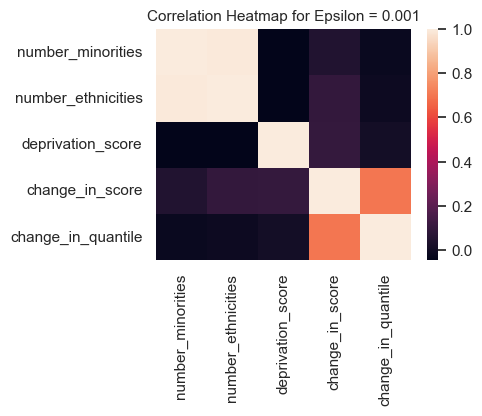

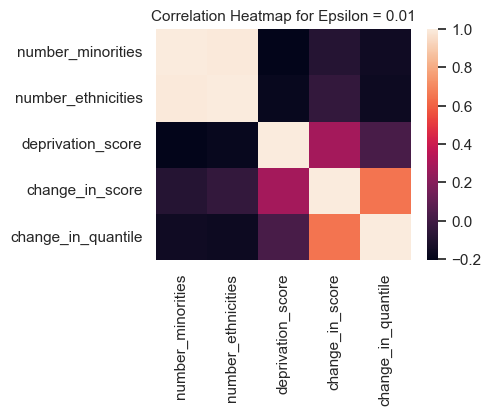

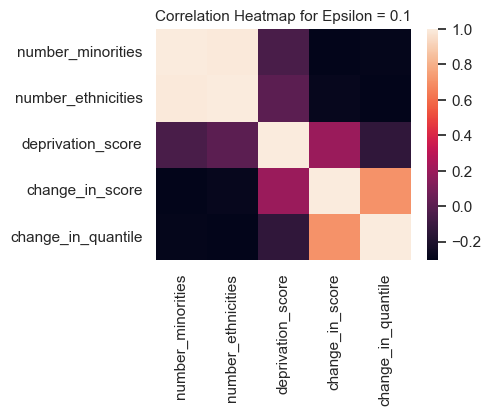

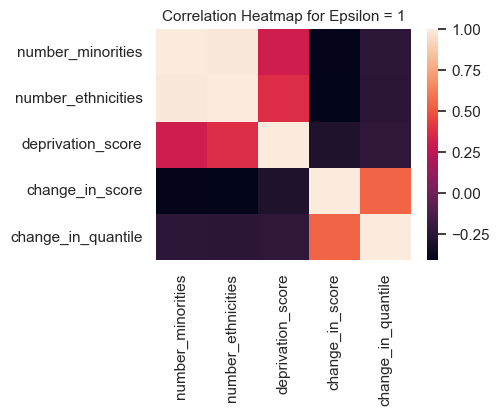

In [18]:
plot_correlation(epsilons_short, geometric_clipping_merged_wards, "Correlation Heatmap")

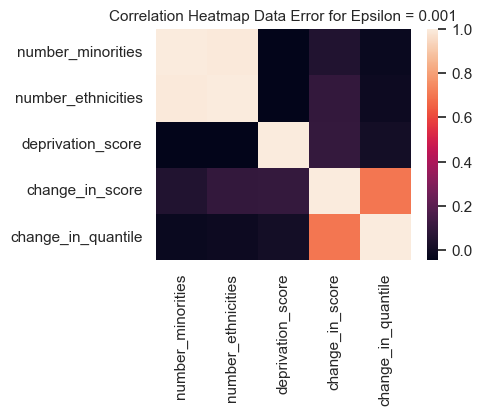

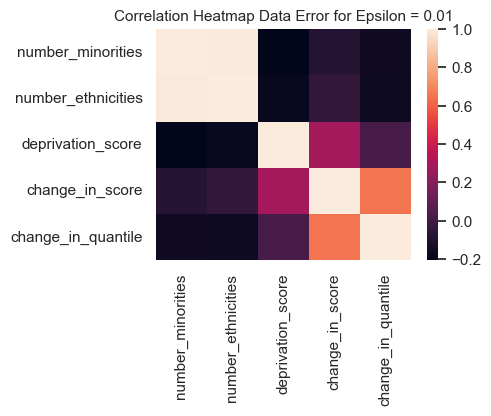

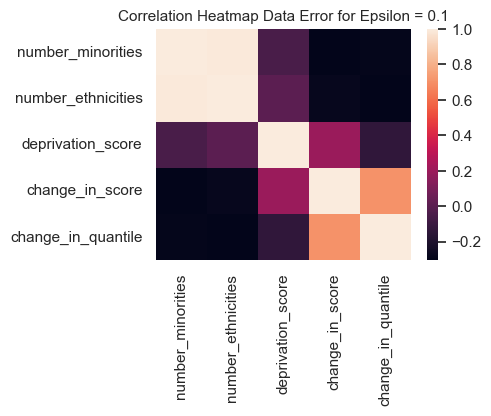

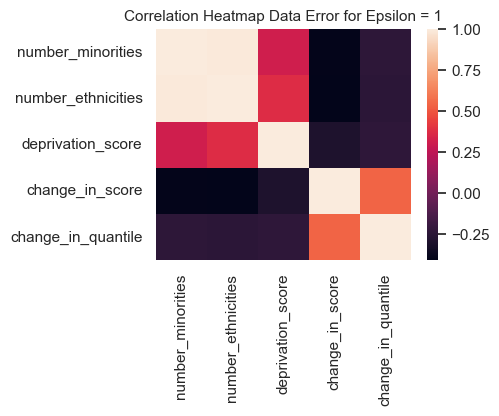

In [19]:
plot_correlation(
    epsilons_short,
    geometric_clipping_data_error_merged_wards,
    "Correlation Heatmap Data Error",
)

Text(0.5, 1.0, 'Correlation Heatmap for Data Error')

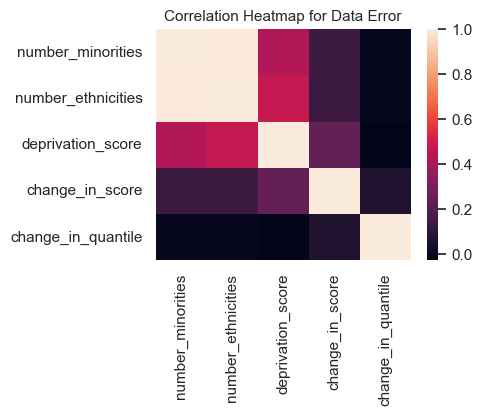

In [20]:
sns.set_theme(font_scale=1)
fig, ax = plt.subplots(figsize=(4, 3))
fig.tight_layout()
corr = data_error_merged_wards[features_corr].corr()
sns.heatmap(corr, ax=ax).set_title("Correlation Heatmap for Data Error", fontsize=11)

<Figure size 640x480 with 0 Axes>

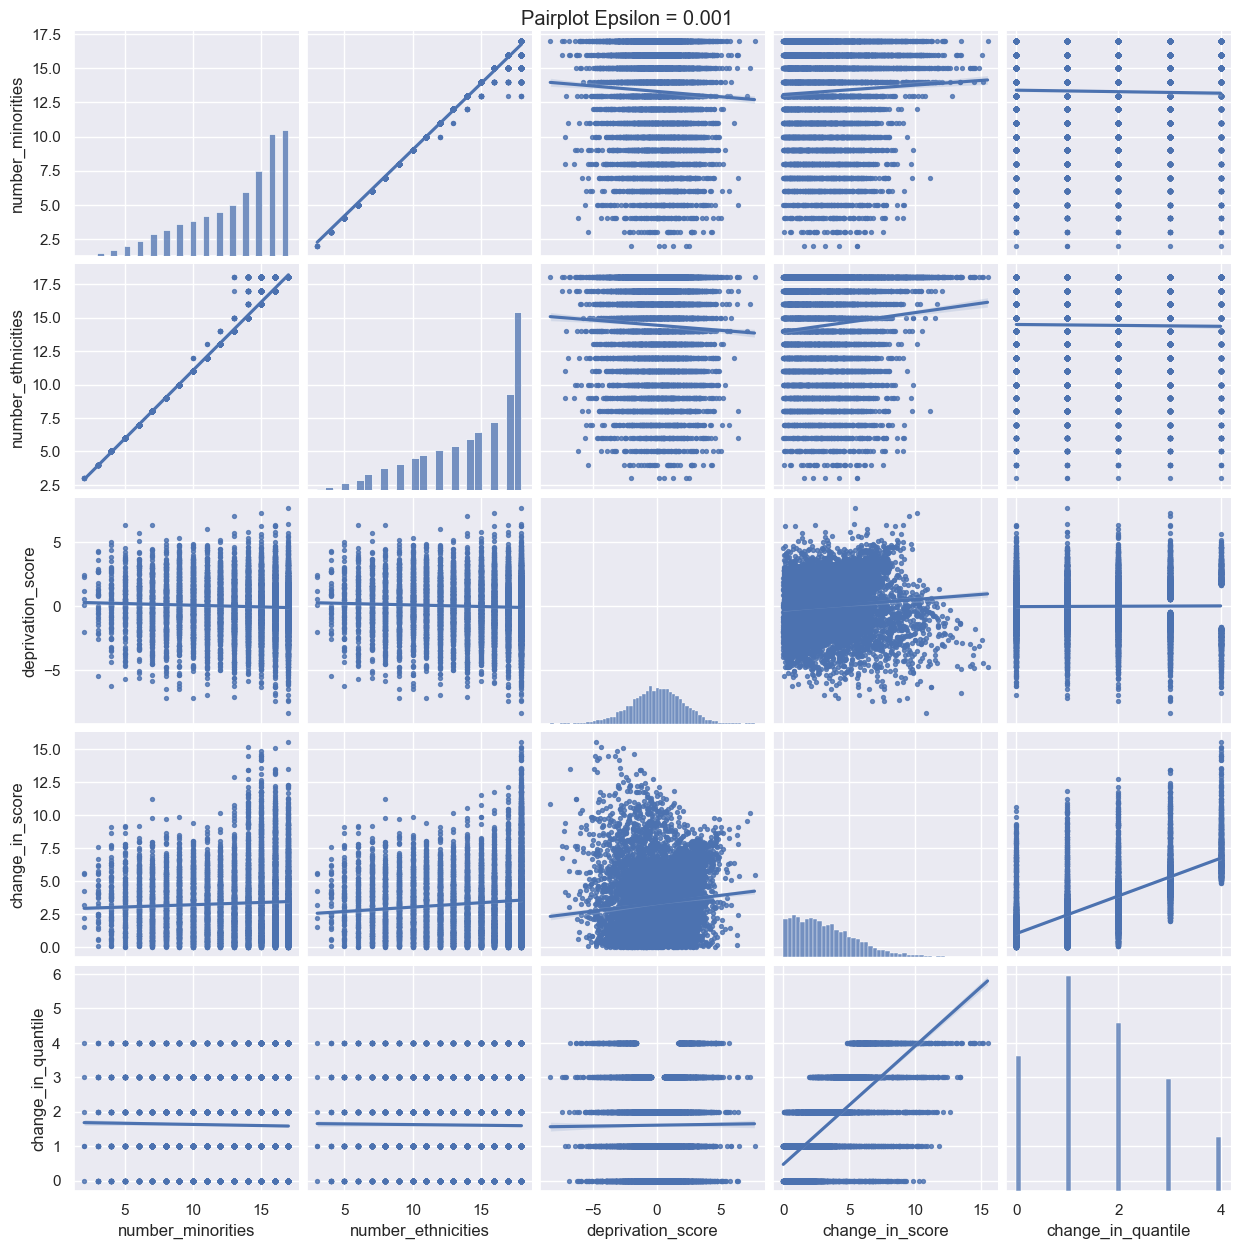

<Figure size 640x480 with 0 Axes>

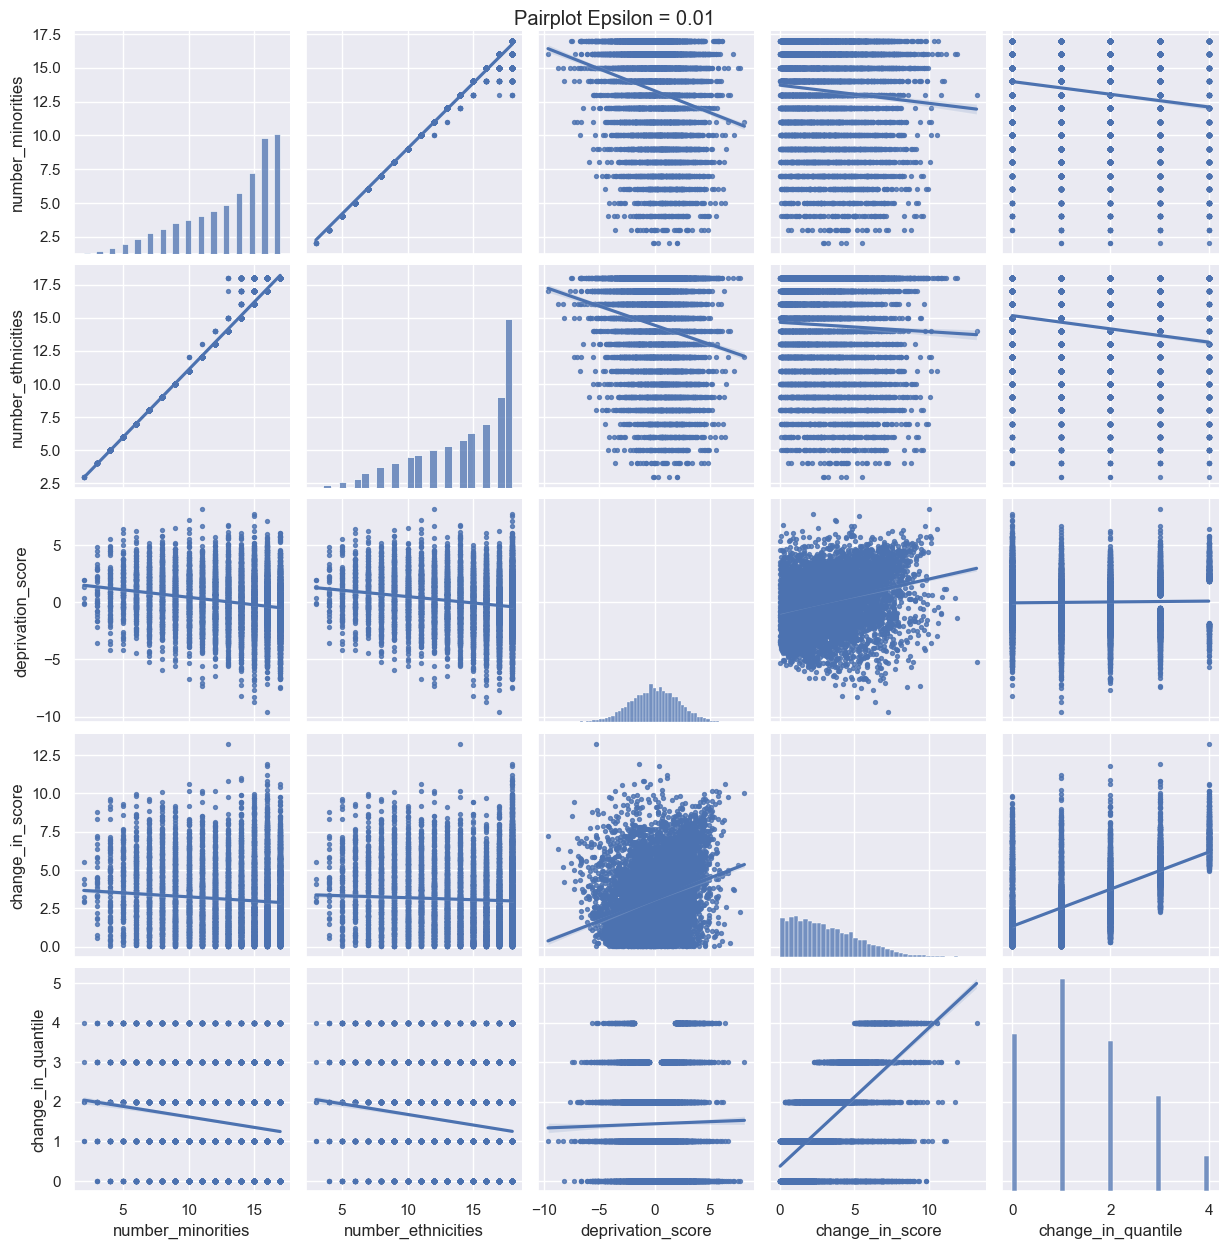

<Figure size 640x480 with 0 Axes>

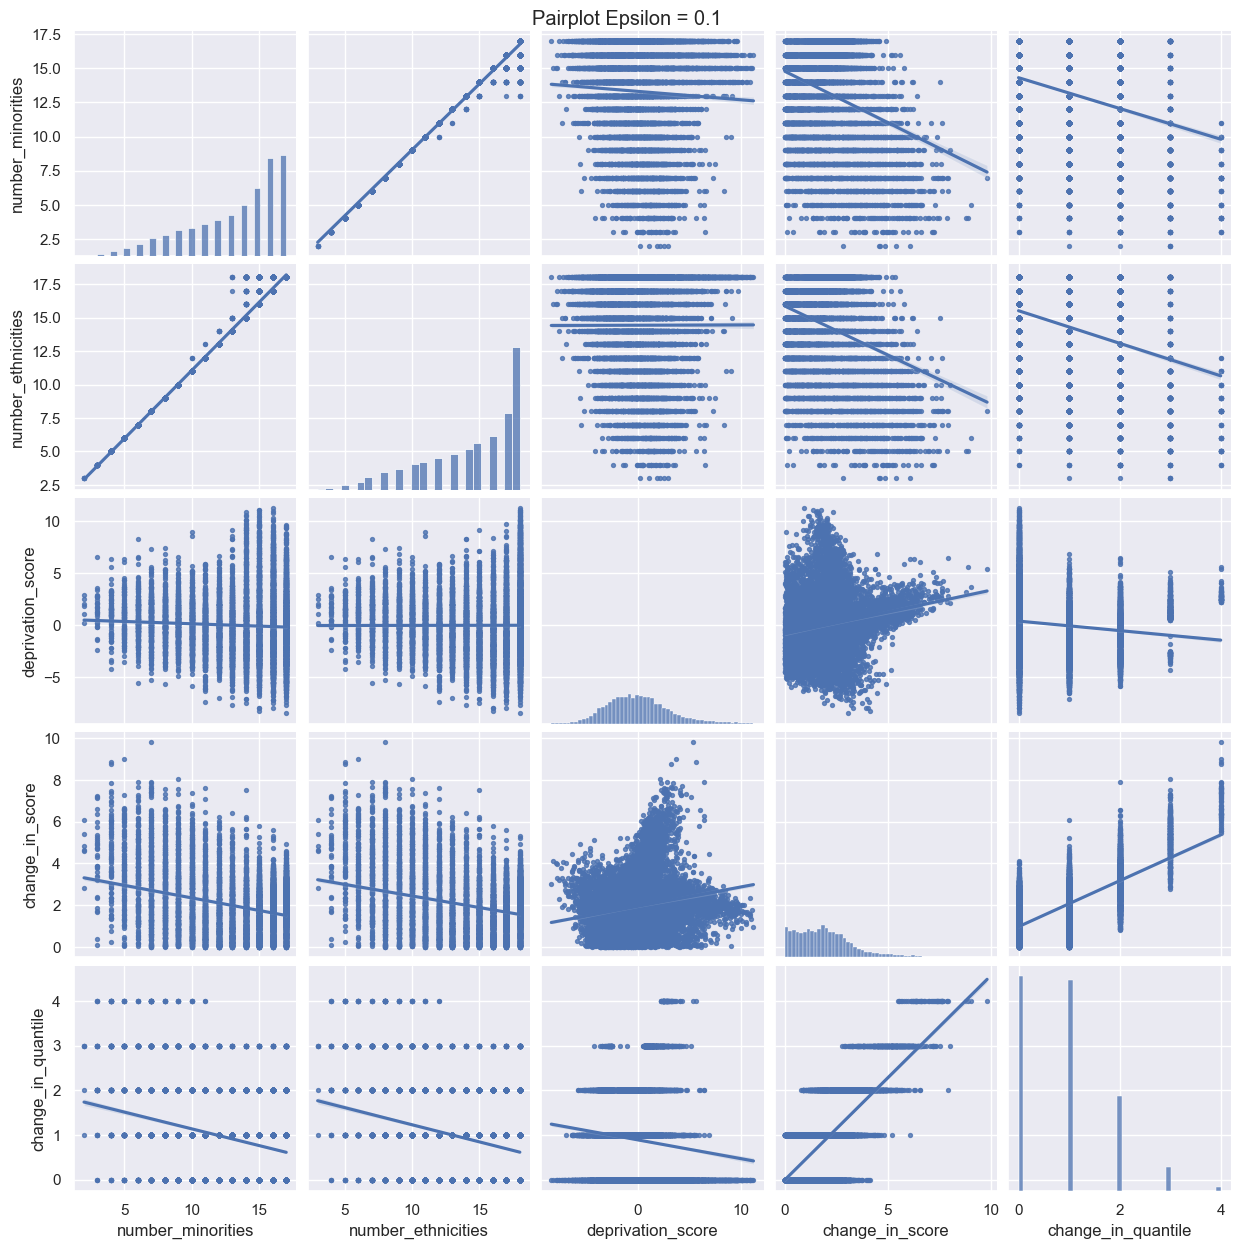

<Figure size 640x480 with 0 Axes>

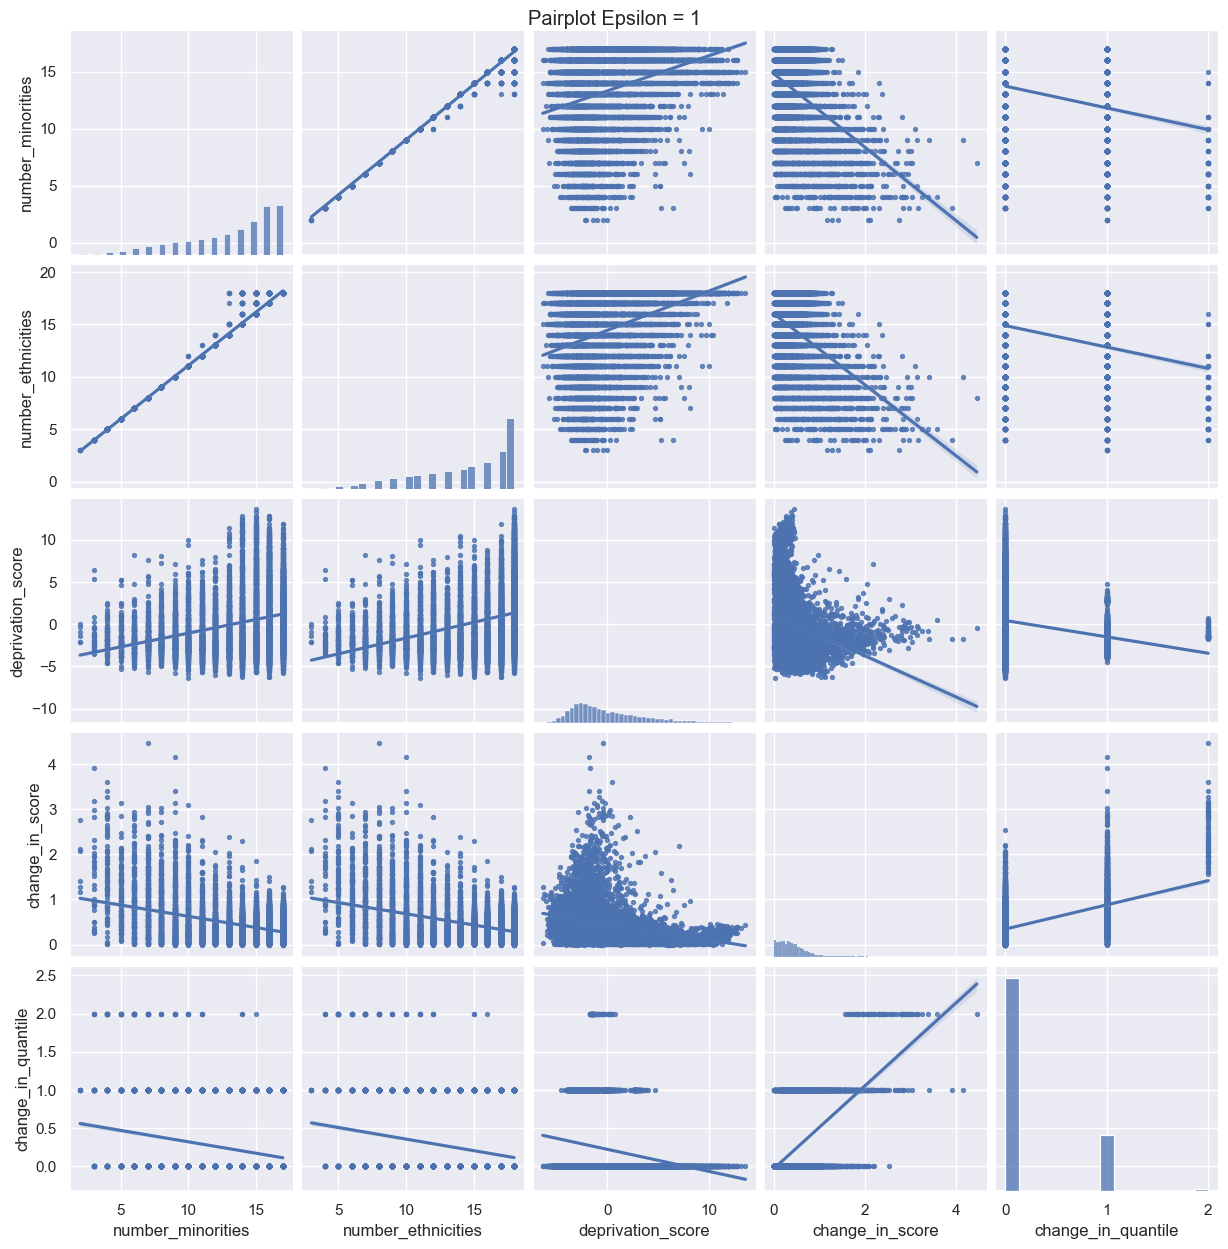

In [22]:
sns.set_style("darkgrid")

geometric_clipping_merged_copy = geometric_clipping_merged_wards.copy(deep=True)
geometric_clipping_merged_copy.reset_index(inplace=True)
geometric_clipping_merged_copy

for epsilon in epsilons_short:
    plt.figure()

    df = geometric_clipping_merged_wards.loc[epsilon]
    sample = df.sample(1000)

    p = sns.pairplot(
        df[features_corr], kind="reg", plot_kws=dict(scatter_kws=dict(s=8))
    )
    p.figure.suptitle(f"Pairplot Epsilon = {epsilon}", y=1)
    plt.savefig(
        (os.path.join(fig_folder_name, "pairplot_reg_{epsilon}.png")),
        bbox_inches="tight",
    )
    plt.savefig(
        (os.path.join(fig_folder_name, "pairplot_reg_{epsilon}.svg")),
        bbox_inches="tight",
    )

In [24]:
def plot_pairplot_without_base(df, features_corr, fig_name):

    sns.set_style("darkgrid")
    df_no_base = df.copy(deep=True)
    df_no_base.drop([0], inplace=True)
    df_no_base.reset_index(inplace=True)

    sample = df_no_base.sample(1000)
    sns.pairplot(
        sample[features_corr],
        kind="scatter",
        hue="epsilon",
        palette="tab10",
        plot_kws=dict(s=15),
    )
    plt.savefig((os.path.join(fig_folder_name, f"{fig_name}.png")), bbox_inches="tight")
    plt.savefig((os.path.join(fig_folder_name, f"{fig_name}.svg")), bbox_inches="tight")

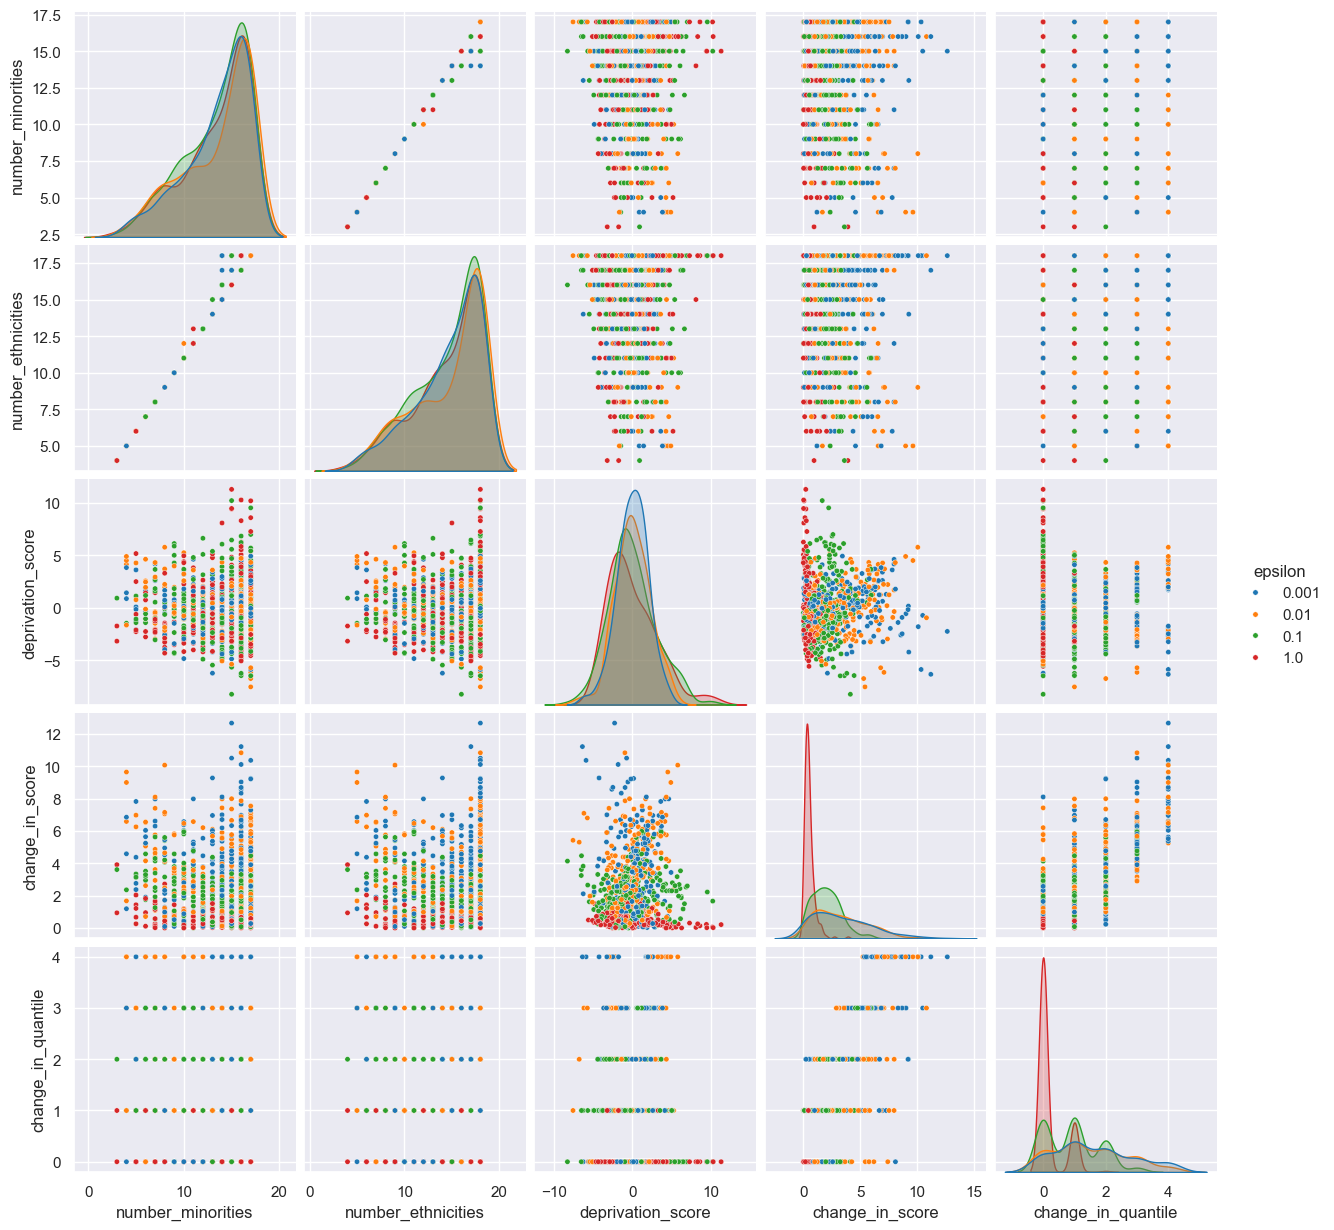

In [25]:
plot_pairplot_without_base(geometric_clipping_merged_wards, features_corr_eps, 'pairplot')

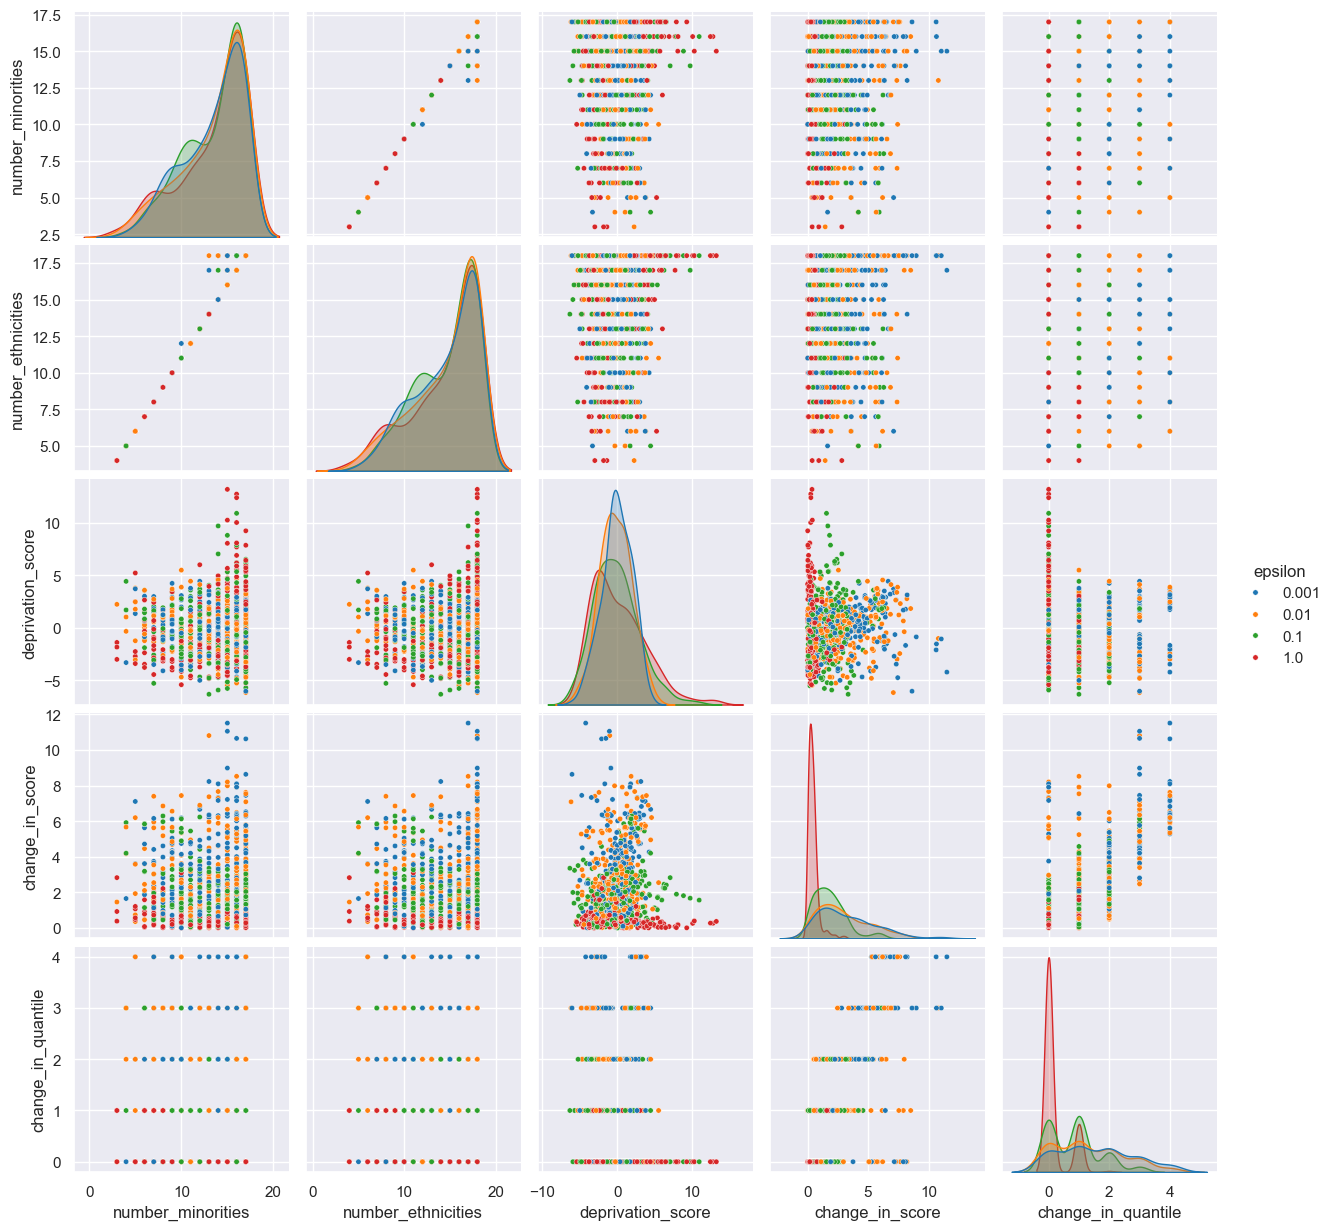

In [26]:
plot_pairplot_without_base(
    geometric_clipping_data_error_merged_wards, features_corr_eps, "pairplot_data_error"
)

In [27]:
""" # using a sample to make this more readable
sns.set_style('darkgrid')
geometric_clipping_merged_copy_no_base = geometric_clipping_merged_wards.copy(deep=True)
geometric_clipping_merged_copy_no_base.drop([0], inplace=True)
geometric_clipping_merged_copy_no_base.reset_index(inplace=True)

sample=geometric_clipping_merged_copy_no_base.sample(1000)
sns.pairplot(sample[features_corr_eps], kind='scatter', hue='epsilon',  palette='tab10', plot_kws=dict(s=15))
plt.savefig((os.path.join(fig_folder_name, 'pairplot.png')), bbox_inches='tight') 
plt.savefig((os.path.join(fig_folder_name, 'pairplot.svg')), bbox_inches='tight') """

" # using a sample to make this more readable\nsns.set_style('darkgrid')\ngeometric_clipping_merged_copy_no_base = geometric_clipping_merged_wards.copy(deep=True)\ngeometric_clipping_merged_copy_no_base.drop([0], inplace=True)\ngeometric_clipping_merged_copy_no_base.reset_index(inplace=True)\n\nsample=geometric_clipping_merged_copy_no_base.sample(1000)\nsns.pairplot(sample[features_corr_eps], kind='scatter', hue='epsilon',  palette='tab10', plot_kws=dict(s=15))\nplt.savefig((os.path.join(fig_folder_name, 'pairplot.png')), bbox_inches='tight') \nplt.savefig((os.path.join(fig_folder_name, 'pairplot.svg')), bbox_inches='tight') "